In [132]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fonm
from matplotlib import font_manager, rc
mpl.rcParams['axes.unicode_minus'] = False
font_path = 'C:/Windows/Fonts/정직_1.ttf'
font = fonm.FontProperties(fname=font_path).get_name()
rc('font', family=font)
import numpy as np
import pandas as pd
import seaborn as sns

In [133]:
df = pd.read_excel('C:\\Workspace\\python\\Data_Science\\dataA\\분반(A반)\\가공_MyData\\대출신용정보.xlsx')
df.describe()

,나이,추정소득,대출건수,연체금액,신용지수
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,45.514867,10615.100000,14.990933,998.272667,5.001700
std,13.556781,5468.534567,8.879375,577.519712,2.887932
min,20.000000,1200.000000,0.000000,0.000000,0.000857
25%,35.000000,5800.000000,7.000000,500.000000,2.491569
50%,46.000000,10600.000000,15.000000,1000.000000,5.012061
75%,56.000000,15300.000000,23.000000,1490.000000,7.493935
max,72.000000,20000.000000,30.000000,2000.000000,9.999767


In [134]:
df.columns

Index(['이름', '생년월일', '나이', '성별', '고용형태', '추정소득', '대출건수', '연체금액', '신용지수'], dtype='object')

In [135]:
df.dtypes

이름              object
생년월일    datetime64[ns]
나이               int64
성별              object
고용형태            object
추정소득             int64
대출건수             int64
연체금액             int64
신용지수           float64
dtype: object

In [136]:
df.head()

,이름,생년월일,나이,성별,고용형태,추정소득,대출건수,연체금액,신용지수
0,김음증,1967-11-21,52,F,급여_공공,4500,16,70,3.169777
1,윤제생,1997-09-02,22,M,급여_일반,10900,9,700,7.133219
2,김하달,1966-06-28,53,M,무직_일반,4600,20,200,1.020494
3,이향찬,1955-10-24,64,F,정보없음,6600,8,130,8.419799
4,최추년,1959-06-27,60,F,자영업_서비스,16300,7,1400,8.638049


In [137]:
df.고용형태.value_counts(), df.성별.value_counts()

(자영업_서비스    3051
 무직_일반      3044
 정보없음       2996
 급여_일반      2993
 급여_공공      2916
 Name: 고용형태, dtype: int64,
 M    7527
 F    7473
 Name: 성별, dtype: int64)

In [138]:
df_train = df.iloc[:, 2:]
print(df_train.isnull().sum())
df_train['성별'] = df_train['성별'].apply(lambda x: 0 if x == 'M' else 1)
df_train['고용형태'] = df_train['고용형태'].apply(lambda x: 0 if x == '무직_일반' else 1 if x == '급여_일반' else 2 if x == '급여_공공' else 4 if x == '자영업_서비스' else 5) # 5는 정보없음
df_train.고용형태.value_counts()

나이      0
성별      0
고용형태    0
추정소득    0
대출건수    0
연체금액    0
신용지수    0
dtype: int64


4    3051
0    3044
5    2996
1    2993
2    2916
Name: 고용형태, dtype: int64

In [139]:
df_train['신용지수'] = df_train.신용지수.apply(lambda x: round(x, 2))
print(df_train.shape)
df_train.head() 

(15000, 7)


,나이,성별,고용형태,추정소득,대출건수,연체금액,신용지수
0,52,1,2,4500,16,70,3.17
1,22,0,1,10900,9,700,7.13
2,53,0,0,4600,20,200,1.02
3,64,1,5,6600,8,130,8.42
4,60,1,4,16300,7,1400,8.64


C:\Users\Bestc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


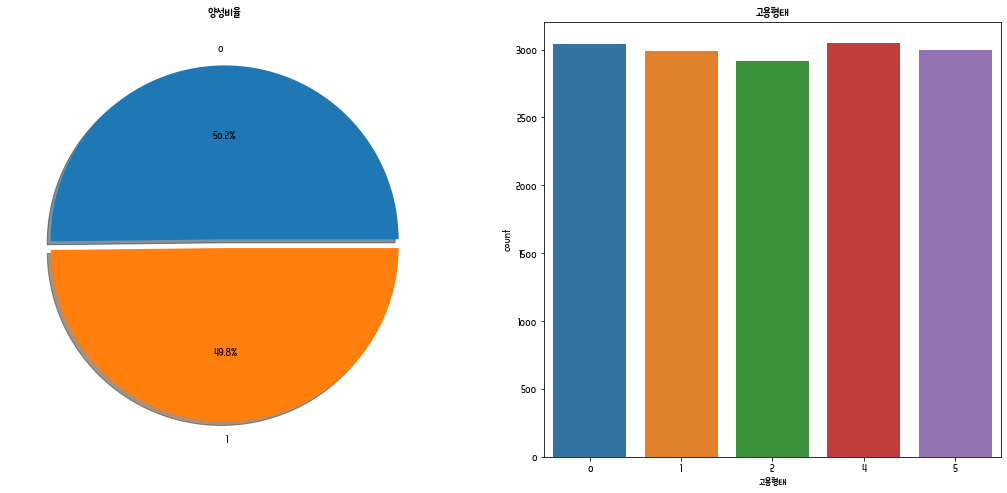

In [140]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

df_train['성별'].value_counts().plot.pie(explode=[0, 0.05], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('양성비율')
ax[0].set_ylabel('')
sns.countplot('고용형태', data=df_train, ax=ax[1])
ax[1].set_title('고용형태')

plt.show()

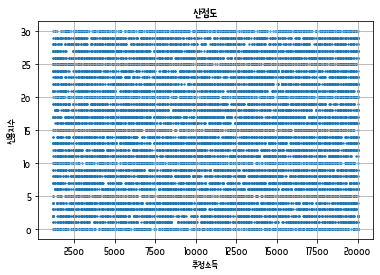

In [141]:
plt.scatter(df_train['추정소득'], df_train['대출건수'], s = 2)
plt.title('산점도')
plt.xlabel('추정소득')
plt.ylabel('신용지수')
plt.grid(True)
plt.show()

['Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r

<AxesSubplot:title={'center':'특성별 피어슨 상관계수'}>

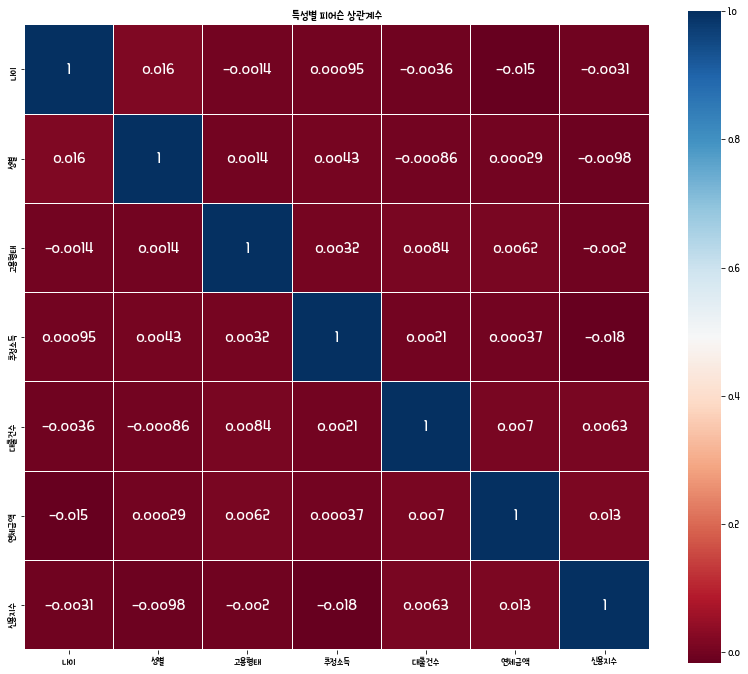

In [142]:
heatmap_data = df_train[['나이', '성별', '고용형태', '추정소득', '대출건수', '연체금액', '신용지수']]
print(plt.colormaps())
colormap = plt.cm.RdBu
plt.figure(figsize = (14, 12))
plt.title('특성별 피어슨 상관계수')
sns.heatmap(heatmap_data.astype(float).corr(), linewidth = 0.1, vmax = 1.0, square = True, cmap = colormap, linecolor = 'white', annot = True, annot_kws = {'size' : 16})

In [143]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import scale, robust_scale, minmax_scale, maxabs_scale

In [145]:
df_train

,나이,성별,고용형태,추정소득,대출건수,연체금액,신용지수
0,52,1,2,4500,16,70,3.17
1,22,0,1,10900,9,700,7.13
2,53,0,0,4600,20,200,1.02
3,64,1,5,6600,8,130,8.42
4,60,1,4,16300,7,1400,8.64
...,...,...,...,...,...,...,...
14995,69,1,4,17700,18,1610,3.74
14996,20,1,1,9100,6,1070,3.20
14997,56,0,4,5700,9,1860,5.66
14998,67,1,1,17900,25,210,8.28


In [168]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_train.iloc[:, :-1], df_train.iloc[:, -1:], test_size = 0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape
model.fit(X_train, y_train)
model.coef_, model.intercept_
y_test['신용지수(예측)']= model.predict(X_test)
y_test

,신용지수,신용지수(예측)
10714,9.02,4.939994
12037,1.80,4.946267
12826,3.98,4.929747
3987,8.03,5.036829
12668,9.42,4.881795
...,...,...
3080,8.16,4.990999
8005,0.48,4.971408
5375,9.29,4.863950
355,1.11,4.903595
